In [1]:
import pandas as pd

path_to_bz="./challenge/searches.csv.bz2"


> Inicialmente dividí el fichero con descriptores, pero es mejor trabajar con read_csv. Es muy potente con sus parametros

> A través del parámetro nrows nos permite extraer n filas para una primera exploración. Y con usecolums extraer solo las columnas deseadas

In [4]:
df = pd.read_csv(path_to_bz,sep='^',nrows = 1000)
df.T



,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
Date,2013-01-01,2013-01-01,2013-01-01,2013-01-01,2013-01-01,2013-01-01,2013-01-01,2013-01-01,2013-01-01,2013-01-01,...,2013-01-01,2013-01-01,2013-01-01,2013-01-01,2013-01-01,2013-01-01,2013-01-01,2013-01-01,2013-01-01,2013-01-01
Time,20:25:57,10:15:33,18:04:49,17:42:40,17:48:29,22:00:28,10:47:14,23:39:49,17:08:46,19:57:57,...,17:34:46,22:03:14,19:12:06,23:51:52,11:43:45,14:58:25,16:03:50,02:16:11,13:01:24,22:48:50
TxnCode,MPT,MPT,MPT,FXP,MPT,MPT,MPT,MPT,MPT,MPT,...,FXP,MPT,CAL,MPT,MPT,MPT,FXP,MTP,FFP,MPT
OfficeID,624d8c3ac0b3a7ca03e3c167e0f48327,b0af35b31588dc4ab06d5cf2986e8e02,3561a60621de06ab1badc8ca55699ef3,1864e5e8013d9414150e91d26b6a558b,1ec336348f44207d2e0027dc3a68c118,3561a60621de06ab1badc8ca55699ef3,d327ca6e35cc6732d4709828327ac7c1,38a3abb0a28e3f00fa79a11f552a5052,c8daef4f8bf73a61aa2c928705f7b82d,28d7a8c95e4db88589d3d35b66920e78,...,1864e5e8013d9414150e91d26b6a558b,440642a9bdaeb6287f826cefd73255e8,64c955f4e10e1e9355ae7d32bc77a7a9,57a5ef0a40c8427bf13013630dc355c6,788e52ddaa551032c69ba37cc316233f,c8daef4f8bf73a61aa2c928705f7b82d,266a430550a2a2bf1ceb2e5b09f1991c,0632d0675e69cac2473475b2261fc4b9,89cc49bf7febdbe40c1b7db87facb2ae,7f45b8c2329242b93ccfcc1082036bc3
Country,DE,MD,US,SE,NO,US,DK,FR,ES,DE,...,SE,US,RU,GB,FR,ES,HK,CA,US,IT
Origin,TXL,ATH,ICT,RNB,OSL,IAH,CPH,PAR,DUS,FRA,...,ARN,BKK,LED,EDI,KUL,ADB,HKG,YYZ,JRO,FLR
Destination,AUH,MIL,SFO,ARN,MAD,BLR,PAR,DUB,ACE,BGW,...,LIN,MDL,BCN,CHI,PAR,DTM,PER,HKG,FRA,LON
RoundTrip,1,0,1,0,1,1,1,1,1,1,...,0,1,1,1,0,0,0,1,1,1
NbSegments,2,1,2,1,2,2,2,2,2,2,...,1,2,2,2,1,1,2,2,2,2
Seg1Departure,TXL,ATH,ICT,RNB,OSL,IAH,CPH,PAR,DUS,FRA,...,ARN,BKK,LED,EDI,KUL,ADB,HKG,YYZ,JRO,FLR


> Exploramos las columnas extraidas con colums

In [5]:
df.columns

Index(['Date', 'Time', 'TxnCode', 'OfficeID', 'Country', 'Origin',
       'Destination', 'RoundTrip', 'NbSegments', 'Seg1Departure',
       'Seg1Arrival', 'Seg1Date', 'Seg1Carrier', 'Seg1BookingCode',
       'Seg2Departure', 'Seg2Arrival', 'Seg2Date', 'Seg2Carrier',
       'Seg2BookingCode', 'Seg3Departure', 'Seg3Arrival', 'Seg3Date',
       'Seg3Carrier', 'Seg3BookingCode', 'Seg4Departure', 'Seg4Arrival',
       'Seg4Date', 'Seg4Carrier', 'Seg4BookingCode', 'Seg5Departure',
       'Seg5Arrival', 'Seg5Date', 'Seg5Carrier', 'Seg5BookingCode',
       'Seg6Departure', 'Seg6Arrival', 'Seg6Date', 'Seg6Carrier',
       'Seg6BookingCode', 'From', 'IsPublishedForNeg', 'IsFromInternet',
       'IsFromVista', 'TerminalID', 'InternetOffice'],
      dtype='object')

> Hacemos una primera aproximación de lo que necesitaríasmo. 

In [7]:
lines = 0
i = 0
for chunk in pd.read_csv(path_to_bz,sep='^', usecols=['Destination','Date' ],chunksize = 100000):  
    lines = lines + len(chunk)
    i = i+1
#    if i == 10:
#        break
        
print(i,"-->",lines)

204 --> 20390198


In [77]:
monthly_searches = pd.DataFrame()
i=0

for chunk in pd.read_csv(path_to_bz,sep = '^', usecols = ['Destination','Date' ], chunksize = 1000000):  
    chunk=chunk[ (chunk['Destination'] == 'AGP') | (chunk['Destination'] == 'MAD') | (chunk['Destination'] == 'BCN')]
    ##chunk['Date'] = pd.to_datetime(chunk['Date'])
    chunk['Month'] = chunk['Date'].str.extract(r'.*?-(\d{2})-.*').astype(int)
    df_aux = chunk.groupby(['Destination','Month']).count()
    monthly_searches = monthly_searches.append(df_aux)
#    i = i+1
#    if i == 1:
#        break



In [76]:
monthly_searches


Date
Destination Month      
AGP         1       507
            2       441
            3       561
            4       435
            5       570
            6       417
            7       468
            8       414
            9       429
            10      271
            11      228
            12      132
BCN         1      1551
            2      1491
            3      1608
            4      1644
            5      1512
            6      1395
            7      1539
            8      1425
            9      1233
            10      839
            11      708
            12      550
MAD         1      1275
            2      1200
            3      1299
            4      1329
            5      1386
            6      1200
            7      1209
            8      1149
            9      1113
            10      915
            11      724
            12      518

In [93]:
monthly_searches[('Destination','Month')]



KeyError: ('Destination', 'Month')

KeyError: ('Destination', 'Month')

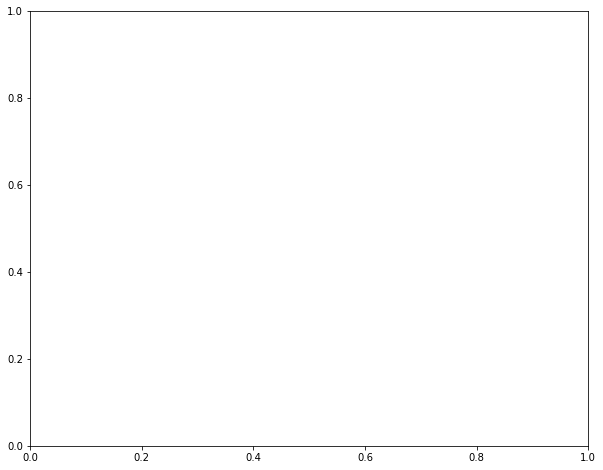

In [88]:
import matplotlib.pyplot as plt

figure, ax = plt.subplots(figsize=(10,8))
ax.plot(x=monthly_searches['Destination', 'Month'],y=monthly_searches['Date'])